In [123]:
#pandas datatable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold
from sklearn import metrics


# Data Retrieval and Preperation 

In [124]:
#Source datacatalog.worldbank.org/dataset/talent-migration-linkedin-data
raw_data = pd.read_csv("skill_migration_public.csv")

In [125]:
raw_data.head()

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,af,Afghanistan,Low income,South Asia,2549.0,Tech Skills,Information Management,-791.59,-705.88,-550.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,af,Afghanistan,Low income,South Asia,2608.0,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,af,Afghanistan,Low income,South Asia,3806.0,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,af,Afghanistan,Low income,South Asia,50321.0,Tech Skills,Software Testing,-957.50,-828.54,-964.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,af,Afghanistan,Low income,South Asia,1606.0,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
#data columns and shape
print(raw_data.shape)
for col in raw_data.columns:
    print(col)

(20647, 29)
country_code
country_name
wb_income
wb_region
skill_group_id
skill_group_category
skill_group_name
net_per_10K_2015
net_per_10K_2016
net_per_10K_2017
net_per_10K_2018
net_per_10K_2019
Unnamed: 12
Unnamed: 13
Unnamed: 14
Unnamed: 15
Unnamed: 16
Unnamed: 17
Unnamed: 18
Unnamed: 19
Unnamed: 20
Unnamed: 21
Unnamed: 22
Unnamed: 23
Unnamed: 24
Unnamed: 25
Unnamed: 26
Unnamed: 27
Unnamed: 28


In [127]:
#find null values
raw_data.isnull().sum(axis=0)

country_code             3030
country_name             3030
wb_income                3030
wb_region                3030
skill_group_id           3030
skill_group_category     3030
skill_group_name         3030
net_per_10K_2015         3030
net_per_10K_2016         3030
net_per_10K_2017         3030
net_per_10K_2018         3030
net_per_10K_2019         3030
Unnamed: 12             20647
Unnamed: 13             20647
Unnamed: 14             20647
Unnamed: 15             20647
Unnamed: 16             20647
Unnamed: 17             20647
Unnamed: 18             20647
Unnamed: 19             20647
Unnamed: 20             20647
Unnamed: 21             20647
Unnamed: 22             20647
Unnamed: 23             20647
Unnamed: 24             20647
Unnamed: 25             20647
Unnamed: 26             20647
Unnamed: 27             20647
Unnamed: 28             20647
dtype: int64

In [128]:
#remove redundent Unamed columns
data = raw_data.drop(raw_data.columns[range(12,29)], axis =1, inplace= False)

In [129]:

data.isnull().sum(axis=0)

country_code            3030
country_name            3030
wb_income               3030
wb_region               3030
skill_group_id          3030
skill_group_category    3030
skill_group_name        3030
net_per_10K_2015        3030
net_per_10K_2016        3030
net_per_10K_2017        3030
net_per_10K_2018        3030
net_per_10K_2019        3030
dtype: int64

In [130]:
#remove null values
data.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
20642    12
20643    12
20644    12
20645    12
20646    12
Length: 20647, dtype: int64

In [131]:
data.dropna(axis =0 ,how="all",inplace= True)

In [132]:
#confirm all nulls are removed
data.isnull().sum(axis=0)

country_code            0
country_name            0
wb_income               0
wb_region               0
skill_group_id          0
skill_group_category    0
skill_group_name        0
net_per_10K_2015        0
net_per_10K_2016        0
net_per_10K_2017        0
net_per_10K_2018        0
net_per_10K_2019        0
dtype: int64

In [133]:
#final shape
data.shape

(17617, 12)

# Data Exploration

In [134]:
data.head()

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549.0,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608.0,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806.0,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321.0,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606.0,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64


In [135]:
#region list
data.wb_region.unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa ',
       'Latin America & Caribbean ', 'East Asia & Pacific',
       'North America'], dtype=object)

In [136]:
len(data.wb_region.unique())

7

In [137]:
len(data.skill_group_category.unique())

5

In [138]:
len(data.country_code.unique())

140

In [139]:
len(data.wb_income.unique())

4

In [140]:
income_groups = data.wb_income.unique()
print(income_groups)
linegraph ={"Low income":[],"Upper middle income":[],"Lower middle income":[],"High income":[]}

['Low income' 'Upper middle income' 'Lower middle income' 'High income']


In [141]:
#skillgroup="Tech Skills"


for year in range(2015,2020):
    temp = data.groupby(["wb_income"])['net_per_10K_'+str(year)].mean()
    for group in range(0,4):
        linegraph[income_groups[group]].append(temp[group])

In [142]:

years = [1,2,3,4,5]

linegraph

{'Low income': [60.38537174303696,
  54.65428571428586,
  44.818176100628854,
  63.659283468104015,
  68.6864970799642],
 'Upper middle income': [-87.72287346221442,
  -148.3754569420035,
  -179.5360369068543,
  -133.8769683655536,
  -128.57514938488592],
 'Lower middle income': [-62.233033950617255,
  -102.59924691358019,
  -127.59713580246917,
  -114.97358024691357,
  -116.23694135802441],
 'High income': [-113.8224682814302,
  -155.93301038062287,
  -172.14690426758932,
  -156.30931257208795,
  -161.8040230680511]}

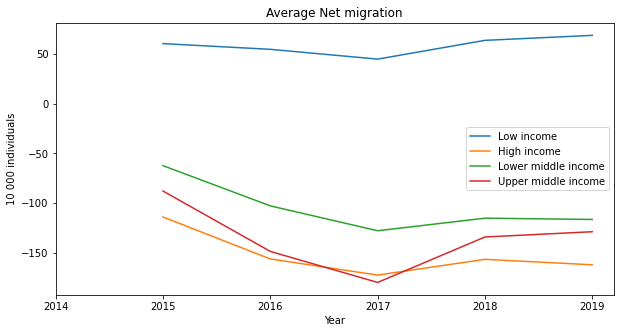

In [146]:

plt.rcParams["figure.figsize"] = 10,5
plt.plot(years, linegraph['Low income'], label="Low income")
plt.plot(years, linegraph['High income'], label="High income")
plt.plot(years, linegraph['Lower middle income'], label="Lower middle income")
plt.plot(years, linegraph['Upper middle income'], label="Upper middle income")
plt.title('Average Net migration')
plt.xticks(np.arange(6),["2014","2015",'2016',"2017",'2018',"2019"])
plt.xlabel('Year')
plt.ylabel('10 000 individuals')
plt.legend()

## Skilled persons intuitively should move from lower income areas to higher income, however the plot shows the opersit trend 

In [60]:
len(data.country_code.unique())

140

#### Average Migiration per County per year

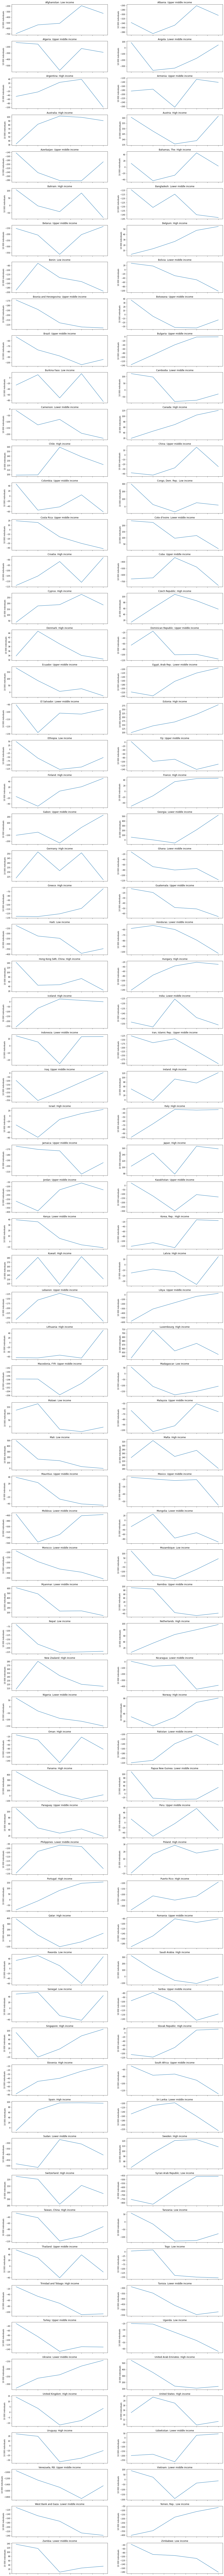

In [156]:
xmax =70
ymax =2

plt.rcParams["figure.figsize"] = 20,250
figure, axes  = plt.subplots(xmax,ymax)
#figure.suptitle("Average Migiration per County")

countries = data.country_name.unique()
i = 0

for x in range(xmax):
    for y in range(ymax):
    
        linegraph ={}
        country = countries[i]
    #skillgroup="Tech Skills"
    #test = data.loc[data["skill_group_category"] == "Tech skils"]
        #axes[i].title(country)
        linegraph[country] = []
        for year in range(2015,2020):
            temp = data.groupby(["country_name"])['net_per_10K_'+str(year)].mean()
            #print(temp)
            linegraph[country].append(temp[country])
        
                
        axes[x,y].plot(years, linegraph[country])
        axes[x,y].set_title(country+": "+ data[data.country_name == country].iloc[0]['wb_income'])
        axes[x,y].set_xticklabels([])
        
        axes[x,y].set_ylabel('10 000 individuals')
        #axes[x,y].legend()
        #print(country)
        i+=1



### Countries appear to follow the intuitive trend with higher income countries haveing postive netflow of individuals

#### Average Migiration per Region

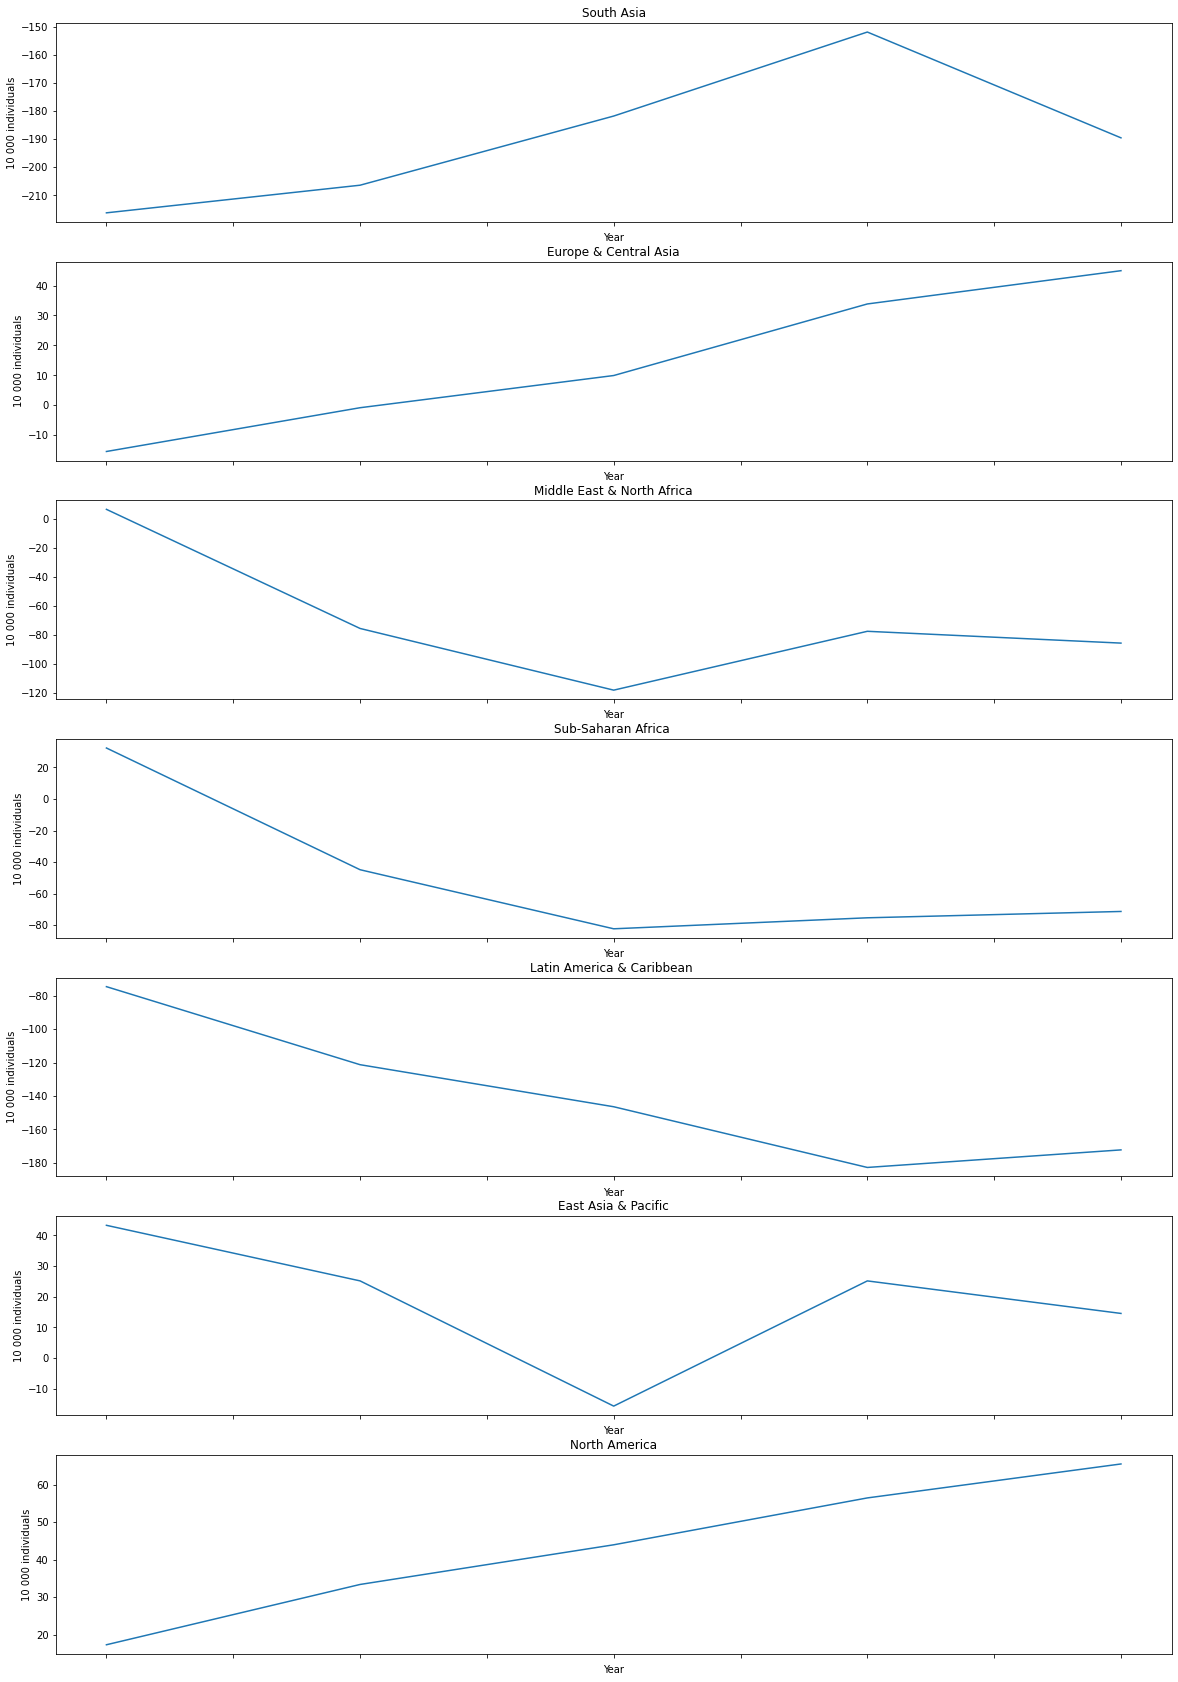

In [162]:
imax =7

plt.rcParams["figure.figsize"] = 20,30
figure, axes  = plt.subplots(imax)

#figure.suptitle("Average Migiration per Region")

regions = data.wb_region.unique()
i = 0

for i in range(7):
    
        linegraph ={}
        region = regions[i]
    #skillgroup="Tech Skills"
    #test = data.loc[data["skill_group_category"] == "Tech skils"]
        #axes[i].title(country)
        linegraph[region] = []
        for year in range(2015,2020):
            temp = data.groupby(["wb_region"])['net_per_10K_'+str(year)].mean()
            #print(temp)
            linegraph[region].append(temp[region])
        
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('10 000 individuals')
        axes[i].plot(years, linegraph[region])
        axes[i].set_title(region)
        axes[i].set_xticklabels([])
        #axes[x,y].legend()
        #print(country)
  

### Region clearly explains some the the data

#### Average Migiration of Income Level per Region

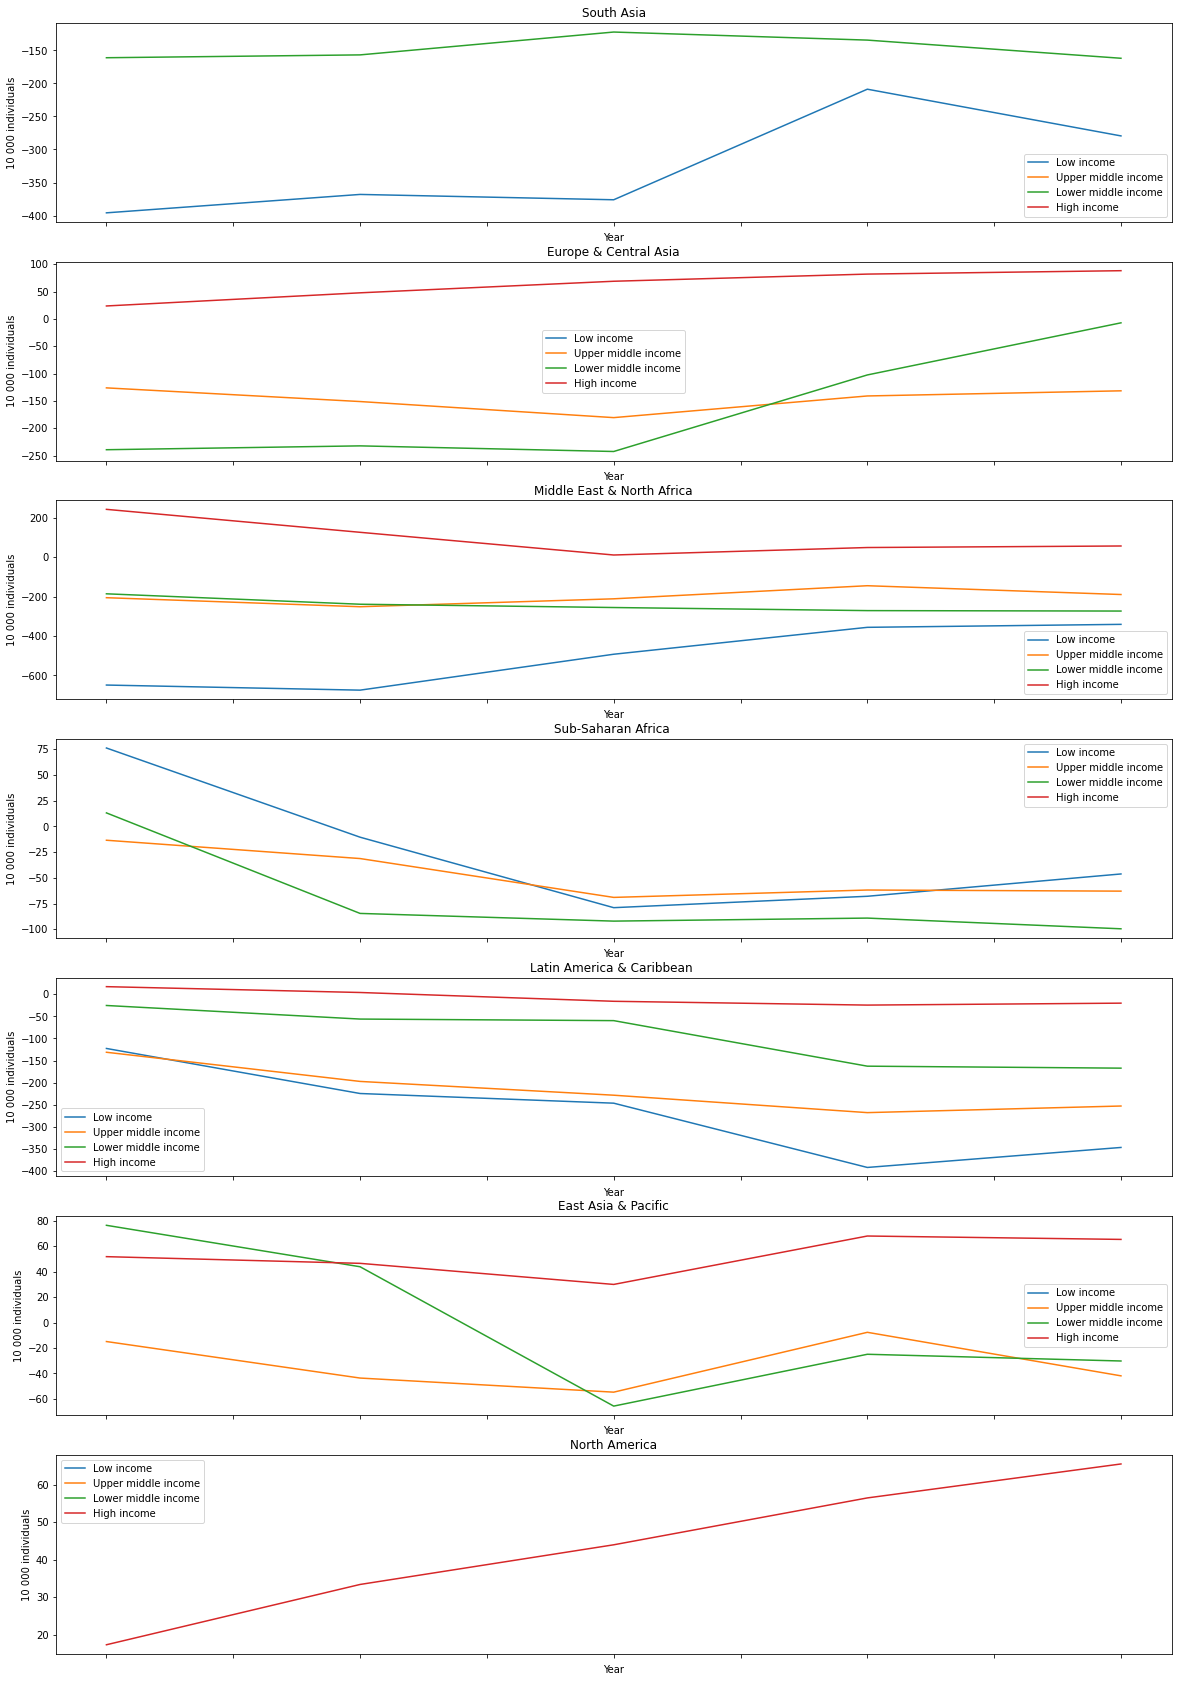

In [165]:
imax =7

plt.rcParams["figure.figsize"] = 20,30
figure, axes  = plt.subplots(imax)
#figure.suptitle("Average Migiration of Income Level per Region")

regions = data.wb_region.unique()
incomeGroup = data.wb_income.unique()

for i in range(7):
    
        linegraph ={}
        region = regions[i]
        for ingrp in incomeGroup:
    #skillgroup="Tech Skills"
    #test = data.loc[data["skill_group_category"] == "Tech skils"]
        #axes[i].title(country)
            
            linegraph[region+ingrp] = []
            for year in range(2015,2020):
                temp = data.groupby(["wb_region","wb_income"])['net_per_10K_'+str(year)].mean()
                #print(temp)
                if((region,ingrp) in temp.keys()):
                    linegraph[region+ingrp].append(temp.loc[region,ingrp])
                else: 
                    linegraph[region+ingrp].append(None)
            axes[i].plot(years, linegraph[region+ingrp], label = ingrp)
        axes[i].legend()
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('10 000 individuals')
        
        axes[i].set_xticklabels([])
        axes[i].set_title(region)
        #axes[x,y].legend()
        #print(country)

### The intuitive trend is present when viewed in terms of region and income level, thus the first visualisation is explained

In [64]:
#debug cell
df = data.groupby(["wb_region","wb_income"])['net_per_10K_2015'].mean()
df



wb_region                   wb_income          
East Asia & Pacific         High income             51.804975
                            Lower middle income     76.446717
                            Upper middle income    -14.930046
Europe & Central Asia       High income             23.580079
                            Lower middle income   -239.191122
                            Upper middle income   -126.136991
Latin America & Caribbean   High income             17.119001
                            Low income            -122.661628
                            Lower middle income    -25.469146
                            Upper middle income   -131.250062
Middle East & North Africa  High income            243.546877
                            Low income            -649.081786
                            Lower middle income   -185.542836
                            Upper middle income   -205.294393
North America               High income             17.261134
South Asia            

# Data Cleaning and Encoding

In [65]:
data_pp = data


#wb_income is ordinal
cat = pd.Categorical(data_pp.wb_income, categories=["Low income","Upper middle income","Lower middle income","High income"], ordered=True)
labels, unique = pd.factorize(cat, sort=True)


#encoder = OrdinalEncoder(categories=["Low income","Upper middle income","Lower middle income","High income"])
print(data_pp.wb_income.values)

data_pp.wb_income = labels
print(data_pp.wb_income.values)
print(data_pp.wb_income.unique())

#data_pp.wb_income = encoder.fit_transform(data_pp.wb_income.values.reshape(-1,1))

['Low income' 'Low income' 'Low income' ... 'Low income' 'Low income'
 'Low income']
[0 0 0 ... 0 0 0]
[0 1 2 3]


In [67]:
X = data_pp.values



In [68]:
#skills catergory OneHot encoded as it is categorical data
target_index = 5

temp_transform = ColumnTransformer([('onehot', OneHotEncoder(), [target_index]),('nothing', 'passthrough',[0,1,2,3,4,6,7,8,9,10,11])])
temp_X = temp_transform.fit_transform(X)



In [69]:
X[0]

array(['af', 'Afghanistan', 0, 'South Asia', 2549.0, 'Tech Skills',
       'Information Management', -791.59, -705.88, -550.04, -680.92,
       -1208.79], dtype=object)

In [70]:
temp_X[1]

array([1.0, 0.0, 0.0, 0.0, 0.0, 'af', 'Afghanistan', 0, 'South Asia',
       2608.0, 'Operational Efficiency', -1610.25, -933.55, -776.06,
       -532.22, -790.09], dtype=object)

In [71]:
#region OneHot encoded as it is categorical data
target_index = 8

temp_transform = ColumnTransformer([('onehot', OneHotEncoder(), [target_index]),('nothing', 'passthrough',[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15])])
temp_X = temp_transform.fit_transform(temp_X)

In [72]:
temp_X[1]

array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 'af',
       'Afghanistan', 0, 2608.0, 'Operational Efficiency', -1610.25,
       -933.55, -776.06, -532.22, -790.09], dtype=object)

In [73]:
temp_X2 = np.delete(temp_X, (12,13,15,16),1)
temp_X2[1]

array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0,
       -1610.25, -933.55, -776.06, -532.22, -790.09], dtype=object)

## Feature Selection: 
We would like to predict mirgation of individuals for a particular year. To make these predictions the model will be trained on the following features (wb_income, wb_region, skill_category and 4 years of migration data). Country and related fatures are dropped as there are 140 unique countries as was the skill feature with 1000s of categories. To encode them would vastly increase the training time however region holds a higher level spactial descriptor. skill_id was dropped as it is an id. 

The predicted feature is the netflow migration for 2019

In [74]:
clean_data = temp_X2
len(clean_data)
clean_data = np.asarray(clean_data).astype('float32')
clean_data.shape


(17617, 18)

# Train Test Split

In [75]:
y = clean_data[:,17]
x = clean_data[:,0:17]
x.shape

(17617, 17)

In [76]:
y[1]

-790.09

# Model and Training

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
x_train.shape

(11803, 17)

In [90]:
#Expriment for KFold splitting not used

def baseline_model():
    model = Sequential()
    model.add(Dense(17, input_dim=17, kernel_initializer='normal',activation='relu'))
    model.add(Dense(20, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='relu', kernel_initializer='normal'))
    model.add(Dense(5, activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer ='adam')
    return model

#estimator = KerasRegressor(build_fn = baseline_model, epochs=100, batch_size=20, verbose=0)
#kfold = KFold(n_splits=10)
#results = cross_val_score(estimator, x_train, y_train, cv=kfold)
#print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

KeyboardInterrupt: 

## Choice of ANN. A sequential model is simple to understand, implement and is suitable for a regression model  

In [91]:
model = Sequential()
model.add(Dense(17, input_dim=17, kernel_initializer='normal',activation='relu'))
model.add(Dense(20, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer ='adam', metrics =[keras.metrics.MeanSquaredError()])
model.fit(x_train, y_train, epochs=400, batch_size=10)


Epoch 1/400
1181/1181 [==============================] - 3s 2ms/step - loss: 28427.2512 - mean_squared_error: 28427.2507
Epoch 2/400
1181/1181 [==============================] - 2s 2ms/step - loss: 12036.2190 - mean_squared_error: 12036.2190
Epoch 3/400
1181/1181 [==============================] - 2s 2ms/step - loss: 11418.8337 - mean_squared_error: 11418.8337
Epoch 4/400
1181/1181 [==============================] - 2s 2ms/step - loss: 12199.2715 - mean_squared_error: 12199.2716
Epoch 5/400
1181/1181 [==============================] - 3s 3ms/step - loss: 11062.2356 - mean_squared_error: 11062.2356
Epoch 6/400
1181/1181 [==============================] - 3s 3ms/step - loss: 11512.7936 - mean_squared_error: 11512.7946
Epoch 7/400
1181/1181 [==============================] - 4s 3ms/step - loss: 11645.0041 - mean_squared_error: 11645.0041
Epoch 8/400
1181/1181 [==============================] - 4s 3ms/step - loss: 11475.2301 - mean_squared_error: 11475.2301
Epoch 9/400
1181/1181 [=========

1181/1181 [==============================] - 4s 3ms/step - loss: 9033.2738 - mean_squared_error: 9033.2738
Epoch 68/400
1181/1181 [==============================] - 3s 3ms/step - loss: 9299.5127 - mean_squared_error: 9299.5127
Epoch 69/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9409.7460 - mean_squared_error: 9409.7460
Epoch 70/400
1181/1181 [==============================] - 3s 3ms/step - loss: 10242.1641 - mean_squared_error: 10242.1641
Epoch 71/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9663.4442 - mean_squared_error: 9663.4442
Epoch 72/400
1181/1181 [==============================] - 3s 3ms/step - loss: 9018.6815 - mean_squared_error: 9018.6817
Epoch 73/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8865.9978 - mean_squared_error: 8865.9978
Epoch 74/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9983.2115 - mean_squared_error: 9983.2115
Epoch 75/400
1181/1181 [===========================

1181/1181 [==============================] - 3s 2ms/step - loss: 8567.3630 - mean_squared_error: 8567.3630
Epoch 135/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8377.5309 - mean_squared_error: 8377.5308
Epoch 136/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8153.4291 - mean_squared_error: 8153.4291
Epoch 137/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8538.6155 - mean_squared_error: 8538.6155
Epoch 138/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8948.2639 - mean_squared_error: 8948.2639
Epoch 139/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8702.0782 - mean_squared_error: 8702.0782
Epoch 140/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8878.2380 - mean_squared_error: 8878.2379
Epoch 141/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9157.2304 - mean_squared_error: 9157.2305
Epoch 142/400
1181/1181 [=====================

1181/1181 [==============================] - 2s 2ms/step - loss: 8355.2792 - mean_squared_error: 8355.2792
Epoch 202/400
1181/1181 [==============================] - 2s 2ms/step - loss: 7647.5097 - mean_squared_error: 7647.5097
Epoch 203/400
1181/1181 [==============================] - 3s 2ms/step - loss: 7933.4603 - mean_squared_error: 7933.4603
Epoch 204/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8052.6562 - mean_squared_error: 8052.6562
Epoch 205/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8286.9667 - mean_squared_error: 8286.9667
Epoch 206/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8836.4251 - mean_squared_error: 8836.4251
Epoch 207/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8139.7129 - mean_squared_error: 8139.7129
Epoch 208/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8122.3008 - mean_squared_error: 8122.3008
Epoch 209/400
1181/1181 [=====================

1181/1181 [==============================] - 3s 2ms/step - loss: 7873.8140 - mean_squared_error: 7873.8140
Epoch 269/400
1181/1181 [==============================] - 3s 2ms/step - loss: 7856.8012 - mean_squared_error: 7856.8012
Epoch 270/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8155.8257 - mean_squared_error: 8155.8257
Epoch 271/400
1181/1181 [==============================] - 3s 3ms/step - loss: 7737.7785 - mean_squared_error: 7737.7785
Epoch 272/400
1181/1181 [==============================] - 3s 3ms/step - loss: 7593.7590 - mean_squared_error: 7593.7590
Epoch 273/400
1181/1181 [==============================] - 3s 2ms/step - loss: 7645.6102 - mean_squared_error: 7645.6102
Epoch 274/400
1181/1181 [==============================] - 3s 2ms/step - loss: 7257.7735 - mean_squared_error: 7257.7735
Epoch 275/400
1181/1181 [==============================] - 3s 2ms/step - loss: 7543.8736 - mean_squared_error: 7543.8736
Epoch 276/400
1181/1181 [=====================

1181/1181 [==============================] - 3s 2ms/step - loss: 7265.4786 - mean_squared_error: 7265.4786
Epoch 336/400
1181/1181 [==============================] - 3s 3ms/step - loss: 7331.7978 - mean_squared_error: 7331.7978
Epoch 337/400
1181/1181 [==============================] - 3s 2ms/step - loss: 7109.9494 - mean_squared_error: 7109.9494
Epoch 338/400
1181/1181 [==============================] - 3s 2ms/step - loss: 7504.3952 - mean_squared_error: 7504.3952
Epoch 339/400
1181/1181 [==============================] - 3s 3ms/step - loss: 7543.5437 - mean_squared_error: 7543.5437
Epoch 340/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8467.2493 - mean_squared_error: 8467.2493
Epoch 341/400
1181/1181 [==============================] - 4s 4ms/step - loss: 6900.3633 - mean_squared_error: 6900.3632
Epoch 342/400
1181/1181 [==============================] - 3s 3ms/step - loss: 7543.9385 - mean_squared_error: 7543.9385
Epoch 343/400
1181/1181 [=====================

# The model is somewhat accruate with predictions being within 60 of the actual on average

In [117]:
#model.fit(x_train, y_train, epochs=400, batch_size=5)
y_pred = model.predict(x_test)
print('mean absolute error', metrics.mean_absolute_error(y_test, y_pred))

mean absolute error 56.9022


# Model tuning

In [118]:
#decrased size of hidden layers
model = Sequential()
model.add(Dense(17, input_dim=17, kernel_initializer='normal',activation='relu'))
model.add(Dense(15, activation='relu', kernel_initializer='normal'))
model.add(Dense(5, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer ='adam', metrics =[keras.metrics.MeanSquaredError()])
model.fit(x_train, y_train, epochs=400, batch_size=10)

Epoch 1/400
1181/1181 [==============================] - 3s 2ms/step - loss: 35118.8235 - mean_squared_error: 35118.8234
Epoch 2/400
1181/1181 [==============================] - 3s 3ms/step - loss: 11193.4120 - mean_squared_error: 11193.4120
Epoch 3/400
1181/1181 [==============================] - 3s 2ms/step - loss: 11112.5242 - mean_squared_error: 11112.5242
Epoch 4/400
1181/1181 [==============================] - 3s 2ms/step - loss: 11520.7492 - mean_squared_error: 11520.7492
Epoch 5/400
1181/1181 [==============================] - 3s 3ms/step - loss: 11653.6791 - mean_squared_error: 11653.6790
Epoch 6/400
1181/1181 [==============================] - 3s 2ms/step - loss: 12015.1338 - mean_squared_error: 12015.1338
Epoch 7/400
1181/1181 [==============================] - 2s 2ms/step - loss: 11363.9337 - mean_squared_error: 11363.9337
Epoch 8/400
1181/1181 [==============================] - 3s 2ms/step - loss: 10527.2499 - mean_squared_error: 10527.2498
Epoch 9/400
1181/1181 [=========

1181/1181 [==============================] - 3s 2ms/step - loss: 10069.9469 - mean_squared_error: 10069.9469
Epoch 68/400
1181/1181 [==============================] - 3s 3ms/step - loss: 9808.6307 - mean_squared_error: 9808.6307
Epoch 69/400
1181/1181 [==============================] - 4s 3ms/step - loss: 9524.6703 - mean_squared_error: 9524.6700
Epoch 70/400
1181/1181 [==============================] - 3s 3ms/step - loss: 9651.6056 - mean_squared_error: 9651.6056
Epoch 71/400
1181/1181 [==============================] - 2s 2ms/step - loss: 9597.7628 - mean_squared_error: 9597.7628
Epoch 72/400
1181/1181 [==============================] - 3s 2ms/step - loss: 10179.3906 - mean_squared_error: 10179.3906
Epoch 73/400
1181/1181 [==============================] - 4s 3ms/step - loss: 9580.0280 - mean_squared_error: 9580.0280
Epoch 74/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9225.8879 - mean_squared_error: 9225.8879
Epoch 75/400
1181/1181 [=========================

1181/1181 [==============================] - 3s 2ms/step - loss: 8769.8086 - mean_squared_error: 8769.8086
Epoch 135/400
1181/1181 [==============================] - 2s 2ms/step - loss: 9389.5601 - mean_squared_error: 9389.5601
Epoch 136/400
1181/1181 [==============================] - 4s 3ms/step - loss: 8732.8686 - mean_squared_error: 8732.8692
Epoch 137/400
1181/1181 [==============================] - 4s 3ms/step - loss: 8847.5854 - mean_squared_error: 8847.5854
Epoch 138/400
1181/1181 [==============================] - 4s 3ms/step - loss: 8710.0066 - mean_squared_error: 8710.0066
Epoch 139/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9297.4933 - mean_squared_error: 9297.4933
Epoch 140/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8592.1290 - mean_squared_error: 8592.1293
Epoch 141/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9358.8551 - mean_squared_error: 9358.8551
Epoch 142/400
1181/1181 [=====================

1181/1181 [==============================] - 2s 2ms/step - loss: 8092.8750 - mean_squared_error: 8092.8756
Epoch 202/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8563.2571 - mean_squared_error: 8563.2571
Epoch 203/400
1181/1181 [==============================] - 3s 3ms/step - loss: 9131.3179 - mean_squared_error: 9131.3184
Epoch 204/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8326.7649 - mean_squared_error: 8326.7649
Epoch 205/400
1181/1181 [==============================] - 2s 2ms/step - loss: 9017.8378 - mean_squared_error: 9017.8378
Epoch 206/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8253.4450 - mean_squared_error: 8253.4450
Epoch 207/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8341.1131 - mean_squared_error: 8341.1131
Epoch 208/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9388.0993 - mean_squared_error: 9388.0993
Epoch 209/400
1181/1181 [=====================

1181/1181 [==============================] - 4s 3ms/step - loss: 8559.9924 - mean_squared_error: 8559.9924
Epoch 269/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8560.3983 - mean_squared_error: 8560.3971
Epoch 270/400
1181/1181 [==============================] - 4s 3ms/step - loss: 8779.7832 - mean_squared_error: 8779.7832: 
Epoch 271/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8533.3925 - mean_squared_error: 8533.3920
Epoch 272/400
1181/1181 [==============================] - 4s 3ms/step - loss: 9071.9677 - mean_squared_error: 9071.9677
Epoch 273/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8453.1983 - mean_squared_error: 8453.1983
Epoch 274/400
1181/1181 [==============================] - ETA: 0s - loss: 7981.1448 - mean_squared_error: 7981.14 - 3s 2ms/step - loss: 7988.2980 - mean_squared_error: 7988.2980
Epoch 275/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8139.7117 - mean_squared_err

1181/1181 [==============================] - 3s 2ms/step - loss: 8404.1247 - mean_squared_error: 8404.1247
Epoch 335/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8004.1227 - mean_squared_error: 8004.1227
Epoch 336/400
1181/1181 [==============================] - 4s 3ms/step - loss: 8066.2498 - mean_squared_error: 8066.2498
Epoch 337/400
1181/1181 [==============================] - 3s 3ms/step - loss: 7660.8895 - mean_squared_error: 7660.8894
Epoch 338/400
1181/1181 [==============================] - 2s 2ms/step - loss: 7955.7287 - mean_squared_error: 7955.7287
Epoch 339/400
1181/1181 [==============================] - 4s 3ms/step - loss: 8142.5425 - mean_squared_error: 8142.5425
Epoch 340/400
1181/1181 [==============================] - 4s 3ms/step - loss: 8021.7537 - mean_squared_error: 8021.7537
Epoch 341/400
1181/1181 [==============================] - 2s 2ms/step - loss: 7820.7091 - mean_squared_error: 7820.7091
Epoch 342/400
1181/1181 [=====================

In [119]:
y_pred = model.predict(x_test)
print('mean absolute error', metrics.mean_absolute_error(y_test, y_pred))

mean absolute error 57.7288


In [166]:
#removed hidden layers
model = Sequential()
model.add(Dense(17, input_dim=17, kernel_initializer='normal',activation='relu'))
model.add(Dense(10, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer ='adam', metrics =[keras.metrics.MeanSquaredError()])
model.fit(x_train, y_train, epochs=400, batch_size=10)
y_pred = model.predict(x_test)
print('mean absolute error', metrics.mean_absolute_error(y_test, y_pred))

Epoch 1/400
1181/1181 [==============================] - 2s 2ms/step - loss: 38823.2162 - mean_squared_error: 38823.2161
Epoch 2/400
1181/1181 [==============================] - 2s 1ms/step - loss: 11961.7307 - mean_squared_error: 11961.7307
Epoch 3/400
1181/1181 [==============================] - 2s 2ms/step - loss: 11864.5091 - mean_squared_error: 11864.5091
Epoch 4/400
1181/1181 [==============================] - 2s 2ms/step - loss: 11410.8484 - mean_squared_error: 11410.8484
Epoch 5/400
1181/1181 [==============================] - 2s 2ms/step - loss: 10891.5115 - mean_squared_error: 10891.5115
Epoch 6/400
1181/1181 [==============================] - 3s 3ms/step - loss: 10957.4498 - mean_squared_error: 10957.4507
Epoch 7/400
1181/1181 [==============================] - 3s 2ms/step - loss: 11092.8650 - mean_squared_error: 11092.8650: 0s - loss: 11070.7773 - mean_squared_e
Epoch 8/400
1181/1181 [==============================] - 4s 3ms/step - loss: 11458.4979 - mean_squared_error: 114

1181/1181 [==============================] - 3s 3ms/step - loss: 9702.1966 - mean_squared_error: 9702.1965
Epoch 68/400
1181/1181 [==============================] - 3s 3ms/step - loss: 9565.9753 - mean_squared_error: 9565.9752
Epoch 69/400
1181/1181 [==============================] - 2s 2ms/step - loss: 9502.9083 - mean_squared_error: 9502.9083
Epoch 70/400
1181/1181 [==============================] - 4s 3ms/step - loss: 9628.1998 - mean_squared_error: 9628.1998
Epoch 71/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9189.0068 - mean_squared_error: 9189.0068
Epoch 72/400
1181/1181 [==============================] - 3s 2ms/step - loss: 10519.6826 - mean_squared_error: 10519.6826
Epoch 73/400
1181/1181 [==============================] - 4s 3ms/step - loss: 9791.2999 - mean_squared_error: 9791.2999
Epoch 74/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8971.0008 - mean_squared_error: 8971.0008
Epoch 75/400
1181/1181 [===========================

1181/1181 [==============================] - 3s 2ms/step - loss: 8908.0001 - mean_squared_error: 8908.0001
Epoch 135/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8838.4099 - mean_squared_error: 8838.4099
Epoch 136/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9709.3419 - mean_squared_error: 9709.3418
Epoch 137/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8841.7800 - mean_squared_error: 8841.7800
Epoch 138/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8891.2692 - mean_squared_error: 8891.2692
Epoch 139/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8601.3715 - mean_squared_error: 8601.3715
Epoch 140/400
1181/1181 [==============================] - 3s 3ms/step - loss: 9190.4240 - mean_squared_error: 9190.4240
Epoch 141/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8576.1665 - mean_squared_error: 8576.1665
Epoch 142/400
1181/1181 [=====================

1181/1181 [==============================] - 3s 3ms/step - loss: 8566.6703 - mean_squared_error: 8566.6703
Epoch 202/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8279.1706 - mean_squared_error: 8279.1706
Epoch 203/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8494.2944 - mean_squared_error: 8494.2944
Epoch 204/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8460.8052 - mean_squared_error: 8460.8054
Epoch 205/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9296.9350 - mean_squared_error: 9296.9350
Epoch 206/400
1181/1181 [==============================] - 3s 3ms/step - loss: 9008.7669 - mean_squared_error: 9008.7670: 0s - loss: 9030.2456 - mean_squared_error:
Epoch 207/400
1181/1181 [==============================] - 3s 3ms/step - loss: 8210.4340 - mean_squared_error: 8210.4340
Epoch 208/400
1181/1181 [==============================] - 3s 2ms/step - loss: 9265.1381 - mean_squared_error: 9265.1381
Ep

1181/1181 [==============================] - 2s 2ms/step - loss: 7766.3159 - mean_squared_error: 7766.3159
Epoch 268/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8230.1202 - mean_squared_error: 8230.1202
Epoch 269/400
1181/1181 [==============================] - 2s 2ms/step - loss: 9024.7906 - mean_squared_error: 9024.7906: 0s - loss: 9117.1554 - mean_squared_er
Epoch 270/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8456.6624 - mean_squared_error: 8456.6624
Epoch 271/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8496.6420 - mean_squared_error: 8496.6417
Epoch 272/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8114.1063 - mean_squared_error: 8114.1063
Epoch 273/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8274.2192 - mean_squared_error: 8274.2192
Epoch 274/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8236.1268 - mean_squared_error: 8236.1268
Epoch 

1181/1181 [==============================] - 4s 3ms/step - loss: 8282.3459 - mean_squared_error: 8282.3448
Epoch 335/400
1181/1181 [==============================] - 4s 3ms/step - loss: 8973.2491 - mean_squared_error: 8973.2491
Epoch 336/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8479.6765 - mean_squared_error: 8479.6765
Epoch 337/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8513.8871 - mean_squared_error: 8513.8871
Epoch 338/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8406.5060 - mean_squared_error: 8406.5059
Epoch 339/400
1181/1181 [==============================] - 2s 2ms/step - loss: 8320.9054 - mean_squared_error: 8320.9056
Epoch 340/400
1181/1181 [==============================] - 3s 2ms/step - loss: 8199.5554 - mean_squared_error: 8199.5552
Epoch 341/400
1181/1181 [==============================] - 4s 4ms/step - loss: 8110.1899 - mean_squared_error: 8110.1899
Epoch 342/400
1181/1181 [=====================

1181/1181 [==============================] - 3s 2ms/step - loss: 7765.8563 - mean_squared_error: 7765.8570
mean absolute error 57.677063


In [167]:
#decreased batchsize
model = Sequential()
model.add(Dense(17, input_dim=17, kernel_initializer='normal',activation='relu'))
model.add(Dense(20, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer ='adam', metrics =[keras.metrics.MeanSquaredError()])
model.fit(x_train, y_train, epochs=400, batch_size=5)

Epoch 1/400
2361/2361 [==============================] - 4s 2ms/step - loss: 27834.1831 - mean_squared_error: 27834.1831
Epoch 2/400
2361/2361 [==============================] - 4s 1ms/step - loss: 11024.1248 - mean_squared_error: 11024.1248
Epoch 3/400
2361/2361 [==============================] - 4s 2ms/step - loss: 11795.4379 - mean_squared_error: 11795.4374
Epoch 4/400
2361/2361 [==============================] - 4s 2ms/step - loss: 11971.0177 - mean_squared_error: 11971.0184
Epoch 5/400
2361/2361 [==============================] - 5s 2ms/step - loss: 11467.8654 - mean_squared_error: 11467.8650
Epoch 6/400
2361/2361 [==============================] - 4s 2ms/step - loss: 11512.4176 - mean_squared_error: 11512.4176
Epoch 7/400
2361/2361 [==============================] - 5s 2ms/step - loss: 12589.2868 - mean_squared_error: 12589.2868
Epoch 8/400
2361/2361 [==============================] - 3s 1ms/step - loss: 10869.4197 - mean_squared_error: 10869.4197
Epoch 9/400
2361/2361 [=========

2361/2361 [==============================] - 4s 2ms/step - loss: 9042.6270 - mean_squared_error: 9042.6263
Epoch 68/400
2361/2361 [==============================] - 5s 2ms/step - loss: 9826.2736 - mean_squared_error: 9826.2736
Epoch 69/400
2361/2361 [==============================] - 5s 2ms/step - loss: 9954.3469 - mean_squared_error: 9954.3469
Epoch 70/400
2361/2361 [==============================] - 4s 2ms/step - loss: 8983.2828 - mean_squared_error: 8983.2833
Epoch 71/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8678.2994 - mean_squared_error: 8678.2988
Epoch 72/400
2361/2361 [==============================] - 4s 2ms/step - loss: 10756.8002 - mean_squared_error: 10756.8002
Epoch 73/400
2361/2361 [==============================] - 4s 2ms/step - loss: 9643.6455 - mean_squared_error: 9643.6455
Epoch 74/400
2361/2361 [==============================] - 8s 3ms/step - loss: 8833.1675 - mean_squared_error: 8833.1675
Epoch 75/400
2361/2361 [===========================

2361/2361 [==============================] - 4s 2ms/step - loss: 8442.2505 - mean_squared_error: 8442.2501
Epoch 135/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8592.7212 - mean_squared_error: 8592.7212
Epoch 136/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8783.8571 - mean_squared_error: 8783.8571
Epoch 137/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8880.0276 - mean_squared_error: 8880.0276
Epoch 138/400
2361/2361 [==============================] - 4s 2ms/step - loss: 8558.3749 - mean_squared_error: 8558.3749
Epoch 139/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8079.0827 - mean_squared_error: 8079.0827
Epoch 140/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8811.3917 - mean_squared_error: 8811.3918
Epoch 141/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8446.5141 - mean_squared_error: 8446.5141
Epoch 142/400
2361/2361 [=====================

2361/2361 [==============================] - 4s 2ms/step - loss: 7861.4394 - mean_squared_error: 7861.4394
Epoch 202/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8290.8668 - mean_squared_error: 8290.8668
Epoch 203/400
2361/2361 [==============================] - 5s 2ms/step - loss: 9333.4339 - mean_squared_error: 9333.4338
Epoch 204/400
2361/2361 [==============================] - 5s 2ms/step - loss: 7527.7455 - mean_squared_error: 7527.7455
Epoch 205/400
2361/2361 [==============================] - 4s 2ms/step - loss: 7722.5971 - mean_squared_error: 7722.5971
Epoch 206/400
2361/2361 [==============================] - 5s 2ms/step - loss: 7625.2207 - mean_squared_error: 7625.2207
Epoch 207/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8193.8559 - mean_squared_error: 8193.8559
Epoch 208/400
2361/2361 [==============================] - 4s 2ms/step - loss: 8376.1393 - mean_squared_error: 8376.1393
Epoch 209/400
2361/2361 [=====================

2361/2361 [==============================] - 4s 2ms/step - loss: 8124.6906 - mean_squared_error: 8124.6906
Epoch 269/400
2361/2361 [==============================] - 4s 2ms/step - loss: 7620.2312 - mean_squared_error: 7620.2312
Epoch 270/400
2361/2361 [==============================] - 5s 2ms/step - loss: 7754.7700 - mean_squared_error: 7754.7700
Epoch 271/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8112.4799 - mean_squared_error: 8112.4799
Epoch 272/400
2361/2361 [==============================] - 5s 2ms/step - loss: 7297.6304 - mean_squared_error: 7297.6306
Epoch 273/400
2361/2361 [==============================] - 5s 2ms/step - loss: 7520.9589 - mean_squared_error: 7520.9589
Epoch 274/400
2361/2361 [==============================] - 4s 2ms/step - loss: 7468.8314 - mean_squared_error: 7468.8314
Epoch 275/400
2361/2361 [==============================] - 4s 2ms/step - loss: 7323.3553 - mean_squared_error: 7323.3553
Epoch 276/400
2361/2361 [=====================

2361/2361 [==============================] - 6s 2ms/step - loss: 7903.4522 - mean_squared_error: 7903.4518: 0s - l
Epoch 336/400
2361/2361 [==============================] - 5s 2ms/step - loss: 7670.8439 - mean_squared_error: 7670.8439
Epoch 337/400
2361/2361 [==============================] - 6s 2ms/step - loss: 6877.2336 - mean_squared_error: 6877.2336
Epoch 338/400
2361/2361 [==============================] - 5s 2ms/step - loss: 7249.0863 - mean_squared_error: 7249.0864
Epoch 339/400
2361/2361 [==============================] - 5s 2ms/step - loss: 7817.4818 - mean_squared_error: 7817.4818
Epoch 340/400
2361/2361 [==============================] - 5s 2ms/step - loss: 8038.5231 - mean_squared_error: 8038.5232
Epoch 341/400
2361/2361 [==============================] - 5s 2ms/step - loss: 7237.4079 - mean_squared_error: 7237.4079
Epoch 342/400
2361/2361 [==============================] - 4s 2ms/step - loss: 7862.8703 - mean_squared_error: 7862.8703
Epoch 343/400
2361/2361 [=============

In [168]:
y_pred = model.predict(x_test)
print('mean absolute error', metrics.mean_absolute_error(y_test, y_pred))

mean absolute error 57.019596


#### Tuning the model improved the models performance. Sadly by not a large margin. Possible improvements could be standardising the year features and different or more complex ann arcitecture. 